In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("framingham_heart_study.csv")

In [3]:
data.shape

(4240, 16)

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
data["TenYearCHD"].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

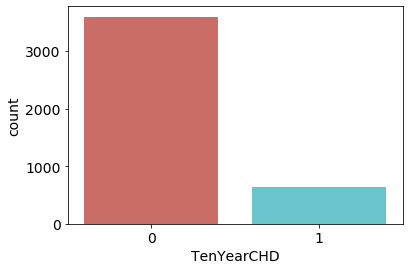

In [7]:
sns.countplot(x="TenYearCHD", data=data, palette='hls')
plt.show()

In [8]:
pd.isnull(data).values.any()

True

In [9]:
data.isnull().values.sum()

645

In [10]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# imputation of null values
# new_data = data.fillna()
new_data = data.fillna(method='ffill')
# new_data = data.fillna(0)

In [12]:
new_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
x = new_data.drop(["TenYearCHD"], axis=1)
y = new_data["TenYearCHD"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=1000)

In [15]:
logreg_classifier = LogisticRegression()

In [16]:
logreg_classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred=logreg_classifier.predict(X_test)

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1077,    5],
       [ 178,   12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

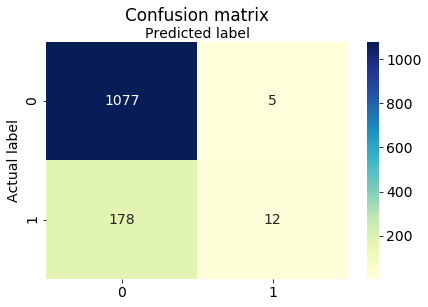

In [19]:
# vidualizing confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8561320754716981
Precision: 0.7058823529411765
Recall: 0.06315789473684211


In [21]:
# reports
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1082
           1       0.71      0.06      0.12       190

    accuracy                           0.86      1272
   macro avg       0.78      0.53      0.52      1272
weighted avg       0.84      0.86      0.80      1272



In [22]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [23]:
print("After oversampling, shape of train x: ", X_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5028, 15)
After oversampling, shape of train y:  (5028,)


In [24]:
#Create a svm Classifier
logreg_classifier.fit(X_train_res, y_train_res)

LogisticRegression()

In [25]:
# predicting the outcome for testing data
y_pred_after_oversampling = logreg_classifier.predict(X_test)

In [26]:
# confiusion matric
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_after_oversampling)
cnf_matrix

array([[759, 323],
       [ 64, 126]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

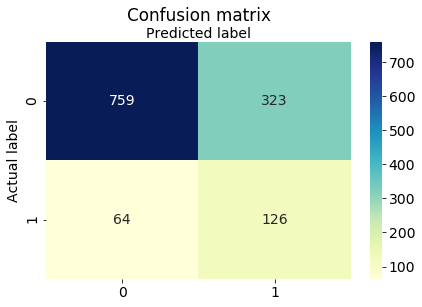

In [27]:
# vidualizing confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
# reports
print(metrics.classification_report(y_test, y_pred_after_oversampling))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1082
           1       0.28      0.66      0.39       190

    accuracy                           0.70      1272
   macro avg       0.60      0.68      0.60      1272
weighted avg       0.83      0.70      0.74      1272

